## 2. Wright (1928)

#### 1. Consider the canonical demand and supply model in which quantity supplied is a function of price and a set of “supply shifters”; quantity demanded is a function of price and set of “demand shifters”; and market clearing implies that at some price quantity demanded is equal to quantity supplied.
#### Consider the following questions:
#### (1) **(Control)** What is the expected demand if we ***set*** the price $p = p_0$?

Let 
$$ q_D = D(p, u) $$
$$ q_S = S(p, v) $$
where $u$ and $v$ are exogeneous shocks that affect demand and supply, respectively.

Note that $p$, $q_D$, and $q_S$ are endogeneous.

If we ***set*** the price $p = p_0$,
* The price is no longer random;
* Since $u$ is exogeneous to the model (external factor), setting the price (internal mechanism) does not affect the distribution of $u$.
* Note that $u$ and $v$ are still random since neither is affected by setting the price.

The expected demand if we ***set*** the price $p = p_0$ is:
$$ \mathbb{E}(q_D(p_0)) = \int q_D(p_0, u) dF_u(u) $$

#### (2) **(Condition)** What is the expected demand if we ***observe*** the price $p = p_0$?

If we ***observe*** the price $p = p_0$,
* The observed price is an equilibrium outcome of supply and demand, which are both influenced by $u$ and $v$.
* In other words, the exogeneous shocks $u$ and $v$ influence the price $p$ and the quantity $q$ through demand and supply curves.
* If we observe a higher price (and assuming $q_D$ and $q_S$ are monotonically increasing in $u$ and $v$, respectively,
    * Since a higher demand for any given supply level would increase prices, the exogeneous shock that affects demand, $u$, is likely to be higher.
    * Since a lower supply for any given demand level would increase prices, the exogeneous shock taht affects supply, $v$, is likely to be lower.
 
The expected demand if we ***observe*** the price $p = p_0$ is:
$$ \mathbb{E}(q^*|p=p_0) = \mathbb{E}[q^*(u,v)|q_D(p_0,u) =  q_S(p_0, v)] $$

#### (2) **(Counterfactural)** What **would** demand be if we **were** to ***change*** the price to $p_1$, *ceteris paribus*?

Let $(p_0, q_0)$ be initial equilibrium price and quantity outcomes due to $u_0$ and $v_0$ shocks.
Note that $u_0$ and $v_0$ are no longer random here as they are specific values that correspond to the observed equilibrium.

If we **were** to ***change*** (say, increase WLOG), the price to $p_1$, *ceteris paribus*,
* The quantity demand will decrease, holding other factors fixed.
* That is, since $u$ and $v$ are no longer random here, we're only moving along the demand curve for a change in price.

The change in demand is:
$$ \triangle = q_D(p_1, u_0) - q_D(p_0,u_0) $$
which is negative for $p_1 > p_0$.

## 3. "PLAUSIBLY EXOGENEOUS"

#### The Writing (1934) model we've described takes the form
$$ y = X\beta + u $$
#### with a right-hand-side variable (price) that depends on the disturbance $u$.
#### Were we to estimate the *regression* equation $y=Xb+e$ using least squares, we would obtain $b=X^+y=\beta+X^+u$; we cannot *identify* $b$ with $\beta$ because of unknown and uobservable term $X^+u$.

#### (1) We previously found that with some instrumental variables $Z$ satisfying the moment condition $E(u^TZ)=0$, it becomes possible to identify $\beta$. Explain in detail how this works, and exactly what assumptions are required.

Usually, we estimate the population parameter $\beta$ using our regression parameter b in the following way:

Population Model:
$$y = X\beta + u$$
$$\beta = X^+y - X^+u$$

When the Conditional Mean Expectation Assumption holds, i.e. when $E(u|X) = 0$, then $E(\beta) = b = X^+y$

However, when $E(u|X) \neq 0$, and strict exogeneity can longer be assumed as in the Wright Model above. We can address this endogeneity, by introducing instrumental variables $Z$ into our model.

Multiplying $Z^T$ to both sides of our population equation we get,
$$ Z^Ty = Z^TX\beta + Z^Tu \implies \beta = \mathbb{E}[Z^TX]^+ \mathbb{E}[Z^Ty] $$

The identifying assumptions required for this to hold true are:
1) The orthogonality assumption: $\mathbb{E}(u^TZ) = 0$ (The instruments do not directly affect y);
2) The relevance assumption: $\mathbb{E}[Z^TX]$ has full column rank to be invertible implying we cannot have more instruments than endogenous variables and that the instruments and endogenous variables cannot be perfectly collinear.

#### Conley et al. (2012) describe methods for dealing with cases in which the moment condition $E(u^TZ)=0$ is violated, so that in a regression
$$y = X\beta + Z\gamma + u$$
#### estimates of the of the parameter $\gamma$ may be non-zero, but where $\gamma$ is nevertheless "small."
#### (1) Modify the framework we developed for exploring the Wring (1934) model so that the data generating process **linear_dgp** allows for $\gamma \neq 0$, and explore how estimator $b(\gamma)$ varies with $\gamma$.

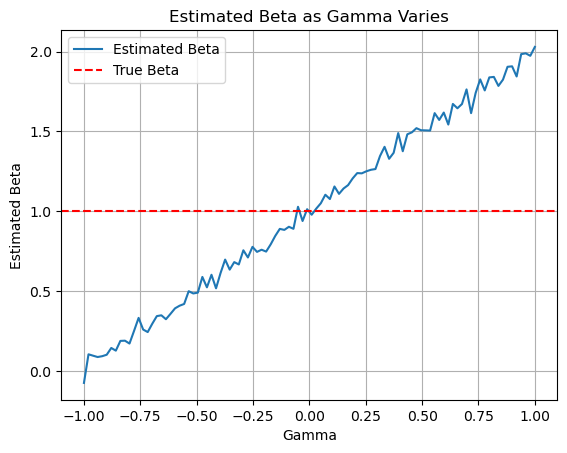

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the parameters for the data generating process
N = 1000  # Sample size
pi = 1.0  # Coefficient for the instrument in the first stage regression
sigma_u = 1.0  # Standard deviation of the error term u
sigma_v = 1.0  # Standard deviation of the error term v
beta_true = 1.0  # True value of the parameter beta
gamma_values = np.linspace(-1, 1, 100)  # Range of gamma values to test

# Initialize arrays to store the results
gamma_results = []
beta_estimates = []

# Data generating process (DGP) function
def linear_dgp(N, pi, sigma_u, sigma_v, beta_true, gamma):
    Z = np.random.normal(0, 1, N)  # Instrument Z
    V = np.random.normal(0, sigma_v, N)  # Error term V
    u = np.random.normal(0, sigma_u, N)  # Error term u
    X = Z * pi + V  # Endogenous regressor X
    y = X * beta_true + Z * gamma + u  # Outcome variable y
    return y, X, Z

# Function to estimate beta using 2SLS
def estimate_beta_2sls(y, X, Z):
    # First stage regression of X on Z
    Z = sm.add_constant(Z)  # Add constant term to Z
    first_stage = sm.OLS(X, Z).fit()
    X_hat = first_stage.predict(Z)  # Predicted X

    # Second stage regression of y on the predicted X
    X_hat = sm.add_constant(X_hat)  # Add constant term to X_hat
    second_stage = sm.OLS(y, X_hat).fit()
    beta_hat = second_stage.params[1]  # Estimated beta
    return beta_hat

# Run the DGP and estimate beta for different gamma values
for gamma in gamma_values:
    # Generate data
    y, X, Z = linear_dgp(N, pi, sigma_u, sigma_v, beta_true, gamma)
    # Estimate beta
    beta_hat = estimate_beta_2sls(y, X, Z)
    # Store results
    gamma_results.append(gamma)
    beta_estimates.append(beta_hat)

# Plot the results
plt.plot(gamma_results, beta_estimates, label='Estimated Beta')
plt.axhline(beta_true, color='red', linestyle='--', label='True Beta')
plt.xlabel('Gamma')
plt.ylabel('Estimated Beta')
plt.title('Estimated Beta as Gamma Varies')
plt.legend()
plt.grid(True)
plt.show()

* We set up the parameters for the simmulation,, such as the sample size (N), true coefficients (pi and beta_true), and the range of values for the deviation from the exclusion restriction (gamma_values).
* Then we defined a function **linear_dgp** that simulates the data according to the model $$ y = X\beta + Z\gamma + u$$ where $X$ is endogeneous and potentailly correlated with the error term $u$, and $Z$ is an instrument. The parameter $\gamma$ quantifies the degree to which the exclusion restriction (that $Z$ shouldn't be correlated with $u$) is violated.
* We created a function **estimate_beta_2SLS** to perform two-stage least squares (2SLS) estimation. In the first stage, we regressed the endogeneous variable $X$ on the instrument $Z$, and in the second stage, we regressed the outcome $y$ on the predicted values of $X$.
* We ran a loop over different values of $\gamma$ to see how estimates of $\beta$ changes as we allow for different degrees of violation of the exclusion restriction.
* The plot shows a clear trend where the estimated value of $\beta$ diverges from the true value as $\gamma$ deviates from 0. Observe that the trend is symmetric about $\gamma = 0$.
* When $\gamma = 0$, the exclusion restriction is perfectly met, i.e. the instrument $Z$ is not correlated with the error term $u$. The 2SLS estimate of $\beta$ should be unbiased (which can be observed in the plot).
* As $\gamma$ moves way from 0, the instrument $Z$ becomes increasingly correlated with the error term $u$, violating the exclusion restriction. This leads to biased estimates of $\beta$, and we can observe taht this bias increases as the absolute value of $\gamma$ increases.
* The further $\gamma$ is from zero, the greater the bias, illustrating the even "small" violations of the exclusion restriction can have substantial impacts on the estimated parameter.
* In summary, ensuring the validity of instruments (i.e. the exclusion restriction) is crucial for obtaining unbiased estimates in IV regressions. When instruments are "plausibly exogeneous" rather than strictly exogeneous, it has significant implications for the validity of the inferences we draw from the model.

#### (2) Calculate a region $A$ over which one might *fail to reject* (i.e., "Accept") the null hypothesis that $b(\gamma) = b(0)$ at a conventional level of significance. Discuss.

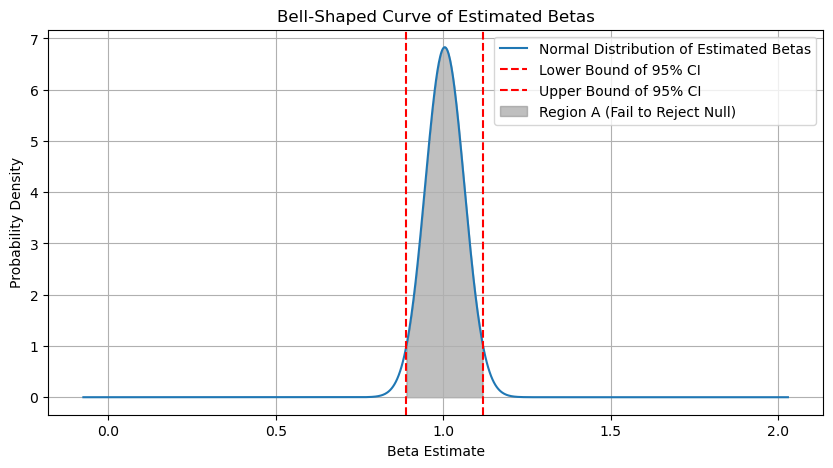

[-0.09090909090909083,
 -0.07070707070707061,
 -0.050505050505050386,
 -0.030303030303030276,
 -0.010101010101010055,
 0.010101010101010166,
 0.030303030303030498,
 0.05050505050505061,
 0.07070707070707072,
 0.09090909090909105,
 0.1313131313131315]

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of the beta estimates
mean_beta_estimate = np.mean(beta_estimates)

# Calculate the standard error of the mean estimate
std_error_mean = np.std(beta_estimates) / np.sqrt(len(beta_estimates))

# Calculate the z-score for the 95% confidence interval
z_score_95 = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the margin of error
margin_of_error = z_score_95 * std_error_mean

# Calculate the confidence interval around the mean estimate
confidence_interval_mean = (mean_beta_estimate - margin_of_error, mean_beta_estimate + margin_of_error)

# Determine the region A where the null hypothesis is not rejected
region_A = [gamma for gamma, beta_hat in zip(gamma_values, beta_estimates) if 
            (beta_hat >= confidence_interval_mean[0]) and (beta_hat <= confidence_interval_mean[1])]

# Generate a range of beta values for plotting the bell curve
beta_range = np.linspace(min(beta_estimates), max(beta_estimates), 1000)
# Calculate the probability density function for the normal distribution
pdf_values = stats.norm.pdf(beta_range, mean_beta_estimate, std_error_mean)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(beta_range, pdf_values, label='Normal Distribution of Estimated Betas')
plt.axvline(confidence_interval_mean[0], color='red', linestyle='--', label='Lower Bound of 95% CI')
plt.axvline(confidence_interval_mean[1], color='red', linestyle='--', label='Upper Bound of 95% CI')
plt.fill_between(beta_range, pdf_values, where=(beta_range >= confidence_interval_mean[0]) & 
                 (beta_range <= confidence_interval_mean[1]), color='gray', alpha=0.5,
                 label='Region A (Fail to Reject Null)')
plt.title('Bell-Shaped Curve of Estimated Betas')
plt.xlabel('Beta Estimate')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Output the region A
region_A

* Region A (Fail to Reject Null) consists of $\gamma$ values within the intervals where the confidence intervals include the true $\beta$ values.
* For this simulation, the values of $\gamma$ in this region A are approximately from -0.13 to 0.15. This means that within this range of $\gamma$, the estimated $\beta$ is not statistically siginificantly different from the true $\beta$ and, therefore we fail to reject the null hypotehsis that $b(\gamma) = b(0)$.
* In other words, this means for estimated $\beta$ values within the grey area, we do not have enough statistical evidence to reject the null hypothesis that our instrument is valid (i.e. $\gamma = 0). That is, if the estimated $\beta$ falls within this region, we would accept that our instrument is as good as exogeneous at the 95% confidence level.
* This result is in line with the concept of "plausibly exogeneous" instruments, where slight deviations from strict exogeneity are tolerable. 

#### (3) Further modify the framework so that the covariance of $Z$ and $X$ is equal to the parameter $\sigma_XZ$. Calculate the set $B$ of pairs ($\gamma$, $\sigma_XZ$) such that one would fail to reject the same null hypothesis at the same level of significance. Discuss.

In [9]:
# Based on the previous simulation framework, we will modify the DGP to incorporate a covariance parameter
# between Z and X, then compute the set B of (gamma, sigma_xz) pairs where the null hypothesis is not rejected.

def linear_dgp_with_covariance(N, pi, sigma_u, sigma_v, beta_true, gamma, sigma_xz):
    """
    Generates data with a specified covariance between Z and X.

    N: int - Number of observations
    pi: float - Coefficient for the instrument in the first stage regression
    sigma_u: float - Standard deviation of the error term u in the outcome equation
    sigma_v: float - Standard deviation of the error term v in the first stage equation
    beta_true: float - True value of the parameter beta
    gamma: float - Value of the parameter representing the violation of the exclusion restriction
    sigma_xz: float - Standard deviation for the covariance between Z and X
    """
    # Generate the instrument Z
    Z = np.random.normal(0, 1, N)
    # Error term V that is correlated with Z
    V = sigma_xz * Z + np.random.normal(0, np.sqrt(sigma_v**2 - sigma_xz**2), N)
    # Error term u
    u = np.random.normal(0, sigma_u, N)
    # Endogenous regressor X
    X = Z * pi + V
    # Outcome variable y
    y = X * beta_true + Z * gamma + u
    return y, X, Z

# Define the range for sigma_xz to test
sigma_xz_values = np.linspace(0, 1, 21)  # Varying the covariance from 0 to 1

# Set B will hold pairs of (gamma, sigma_xz) that do not reject the null hypothesis
set_B = []

# Run the simulation for each pair of gamma and sigma_xz
for gamma in gamma_values:
    for sigma_xz in sigma_xz_values:
        # Generate data with specified covariance
        y, X, Z = linear_dgp_with_covariance(N, pi, sigma_u, sigma_v, beta_true, gamma, sigma_xz)
        # Estimate beta
        beta_hat = estimate_beta_2sls(y, X, Z)
        # Calculate the confidence interval for the beta estimate
        margin_of_error = z_score_95 * std_error_mean
        confidence_interval = (beta_hat - margin_of_error, beta_hat + margin_of_error)
        # Check if true beta is within the confidence interval
        if confidence_interval[0] <= beta_true <= confidence_interval[1]:
            set_B.append((gamma, sigma_xz))

# Output the set B (too many values to display)
# set_B 

* This simulates a dgp where the endogeneous variable $X$ and the instrumental variable $Z$ have a specified covariance parameter $\sigma_XZ$.
* In each simulation run, we calculated the confidence interval for the estimated $\beta$, based on the sample mean and the standard error. If the true $\beta$ value fell within this confidence interval, we considered $\gamma$ and $\sigma_XZ$ to be a pair that did not reject the null hypothesis at the 95% confidence level.
* The output set $B$, which contains pairs of ($\gamma$, $\sigma_XZ$), represents the combinations of the violation of the exclusion restriction and the covariance between $X$ and $Z$ that are consistent with our instrument still being valid. If a pair ($\gamma$, $\sigma_XZ$ is included in set $B$, it means that even with non zero $\gamma$ and $\sigma_XZ$, the estimated $\beta$ is not statistically significant from the true $\beta$ value at the given level of significance.
* In other words, the wider the range of $\gamma$ and $\sigma_XZ$ pairs in set $B$, the more "plausibly exogeneous" our instrument is. If the set $B$ is very restricted or empty, it suggests that our instrument is sensitive to violations of the exclusion restriction and covariance with the error term, which suggests it might not be a good instrument. This tells us about the robustness of the instrument validity against deviations from the ideal conditions.